# Importing Libraries 

  

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pickle

import string
import demoji
import re
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


## Data Loading

In [2]:
# Read JSON data into DataFrame
my_data = pd.read_json('CETM47 data.json')

print("\nDATASET WAS SUCCESFULLY LOADED")



DATASET WAS SUCCESFULLY LOADED


## Data Exploration

In [3]:
print(my_data)  # to print the data 

                                                   text       date  label  \
0     The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1     I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2     Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3     A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4     Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  Praying for {{USERNAME}} family friends riding... 2021-08-29      3   
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear... 2021-08-29      1   
6440  Imagine how hard it is to be a Teume. Everyone... 2021-08-29      2   
6441  Ride With Me - Mental Health Awareness Charity... 2021-08-29      2   
6442  Prediction: The future of CX in {@McKinsey Com... 2021-08-29      1   

                       id                label_name  
0     117051632441986

In [4]:
my_data.head(n = 10).style.background_gradient(cmap = "Dark2")
# to view the first 10 rows of the data

In [5]:
for label in range(6):
    print(f"Label {label}:")
    display(my_data[my_data['label'] == label].head())
# to display the first five rows of each labels so i better understand the sentiments in the tweet 

Label 0:


text       date  label  \
167  I was going to announce this last week, but as... 2019-09-24      0   
193  Shadows Daily Dose of #Beauty & #AltModel #New... 2019-09-25      0   
278  Lakshmi puja is performed during Diwali to inv... 2019-10-06      0   
294  “In 1919, Sylvia Beach sent a telegram to her ... 2019-10-06      0   
420  The 50 Most Beautiful Cities in the World {{UR... 2019-10-20      0   

                      id      label_name  
167  1176314291756195841  arts_&_culture  
193  1176767903183429633  arts_&_culture  
278  1180723668806070272  arts_&_culture  
294  1180812730602799107  arts_&_culture  
420  1185946807357952002  arts_&_culture

Label 1:


text       date  label  \
109  VanillaLace vs dupe with pink himalayan sea sa... 2019-09-15      1   
150  Great to see another Aussie world-leading busi... 2019-09-22      1   
234  . {{USERNAME}} named Top 100 winery in the wor... 2019-09-27      1   
240  8 Companies Utilizing AI to Tackle Climate Cha... 2019-09-28      1   
243  Another SCAM in the making ? {{USERNAME}} {@ET... 2019-09-29      1   

                      id                label_name  
109  1173294063518441472  business_&_entrepreneurs  
150  1175922041427333120  business_&_entrepreneurs  
234  1177674050652590080  business_&_entrepreneurs  
240  1177974886997708800  business_&_entrepreneurs  
243  1178186168665427969  business_&_entrepreneurs

Label 2:


text       date  label  \
21   Y’all leave {@50cent@} alone about that theme ... 2019-09-08      2   
103  Lion cubs escaped to their mother after witnes... 2019-09-15      2   
123  DJEFF vs Projeto Kaya - Beija Flor, Out now, f... 2019-09-16      2   
131  . {@PIX11 News@} Is there a way to watch past ... 2019-09-22      2   
132  Slip Away - Official Music Video {{URL}} via {... 2019-09-22      2   

                      id   label_name  
21   1170636385214226432  pop_culture  
103  1173233967308267520  pop_culture  
123  1173717195077181441  pop_culture  
131  1175618938417373184  pop_culture  
132  1175620585541365760  pop_culture

Label 3:


text       date  label  \
104  1st of all, was good to see you {@stellacreasy... 2019-09-15      3   
152  A Carrum Downs man is lucky to be alive after ... 2019-09-22      3   
190  made gnocchi and brussels sprouts for dinner a... 2019-09-25      3   
230  I heard the bedding donations are steadily com... 2019-09-27      3   
231  Holiday for next year booked to Florida cant w... 2019-09-27      3   

                      id  label_name  
104  1173234011919044608  daily_life  
152  1175922128178147329  daily_life  
190  1176677130358251520  daily_life  
230  1177552470467330048  daily_life  
231  1177552641389400064  daily_life

Label 4:


text       date  label  \
0  The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1  I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2  Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3  A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4  Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   

                    id       label_name  
0  1170516324419866624  sports_&_gaming  
1  1170516440690176006  sports_&_gaming  
2  1170516543387709440  sports_&_gaming  
3  1170516620466429953  sports_&_gaming  
4  1170516711411310592  sports_&_gaming

Label 5:


text       date  label  \
133  Really enjoying this dark mode... Greatly appr... 2019-09-22      5   
141  “Climate change is not a trend. It’s not a big... 2019-09-22      5   
142  Did you miss our recent blog? {{USERNAME}} and... 2019-09-22      5   
148  Climate change: Arctic glaciers  shrinking by ... 2019-09-22      5   
154  Hottest Temperature Record for Each Month of t... 2019-09-23      5   

                      id            label_name  
133  1175620634782687236  science_&_technology  
141  1175771725264564226  science_&_technology  
142  1175800677261565953  science_&_technology  
148  1175861448372838400  science_&_technology  
154  1175982819157381120  science_&_technology

In [6]:
print(type(my_data)) # to print the type of json data

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(len(my_data))  # to print the lenght of json data

6443


In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   text        6443 non-null   object        
 1   date        6443 non-null   datetime64[ns]
 2   label       6443 non-null   int64         
 3   id          6443 non-null   int64         
 4   label_name  6443 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 251.8+ KB


In [9]:
print("Totally there are {} duplicated values in my_data".format(my_data.duplicated().sum()))
# checking for duplicated valeus

Totally there are 0 duplicated values in my_data


In [10]:
print(f' To Check for null values in my_data \n{my_data.isnull().any()}')
# there are zero missing values 

 To Check for null values in my_data 
text          False
date          False
label         False
id            False
label_name    False
dtype: bool


In [11]:
my_data.groupby("label").count()
# To count the number of occurencies of each group 

text  date    id  label_name
label                              
0       144   144   144         144
1       287   287   287         287
2      2512  2512  2512        2512
3       883   883   883         883
4      2291  2291  2291        2291
5       326   326   326         326

In [12]:
# to check the unique values to each label columns in the data 
my_data['label'].value_counts()
# label 4 which is sport and gaming has the highest value and label 0 which is art and culture has the lowest value 

2    2512
4    2291
3     883
5     326
1     287
0     144
Name: label, dtype: int64

# Exploratory Analysis

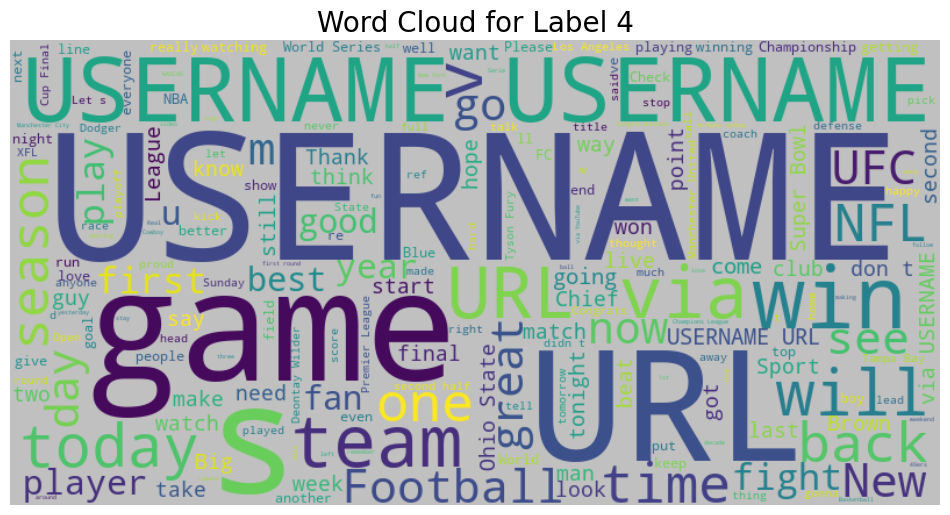

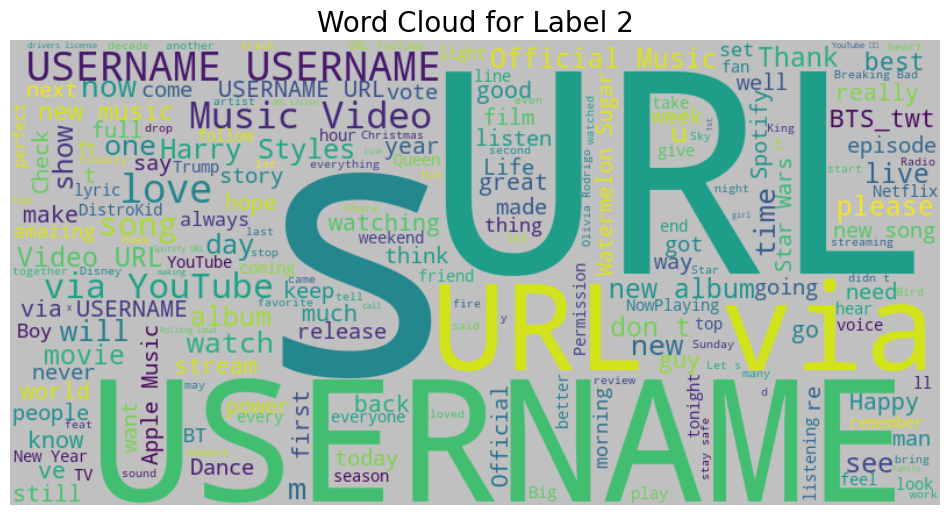

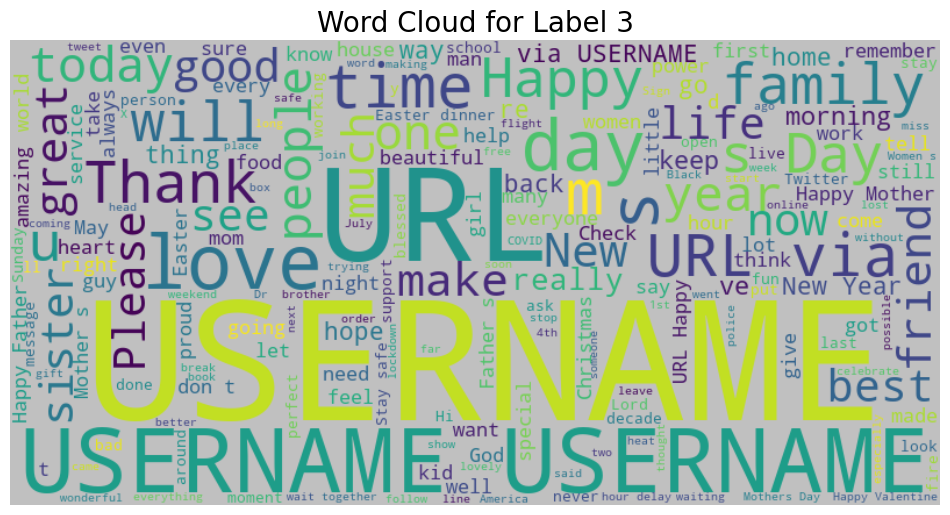

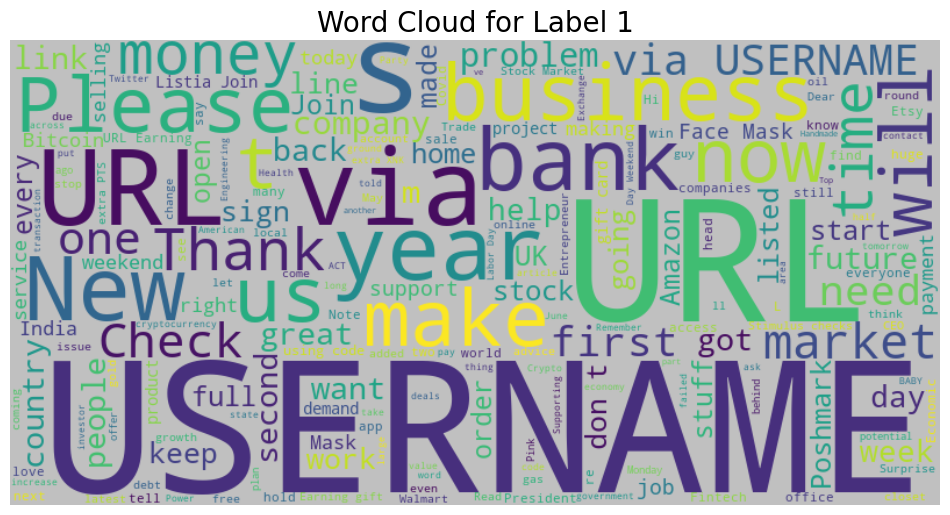

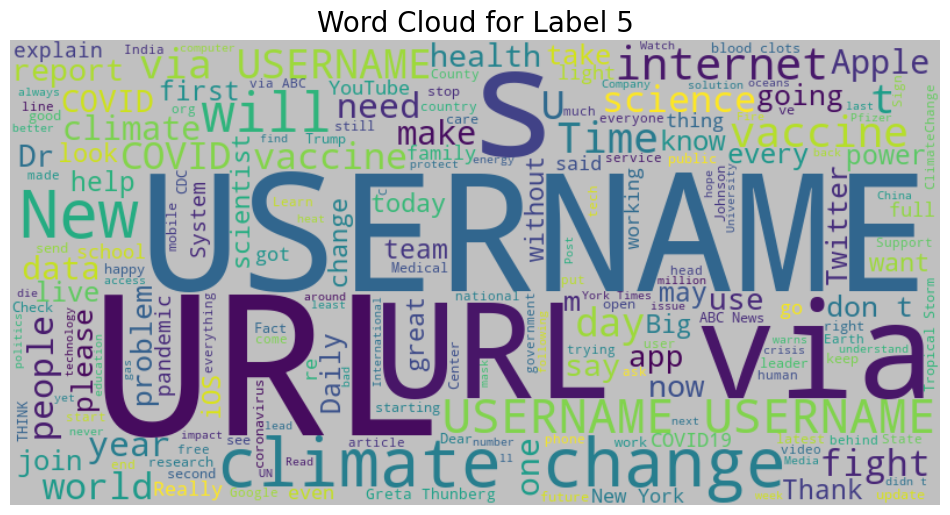

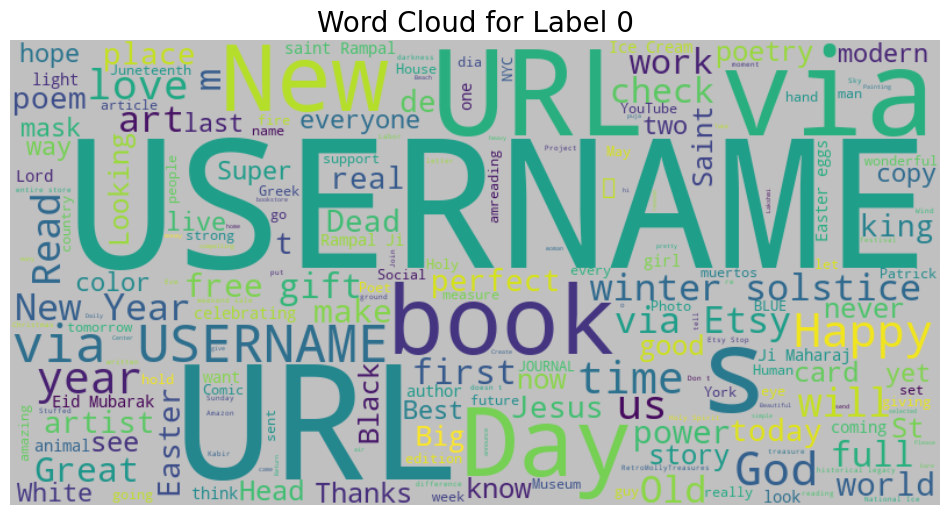

In [13]:
# Plot word cloud for each label to generate the most frequent word in each label 
for label in my_data['label'].unique():
    text = " ".join(text for text in my_data[my_data['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='silver').generate(text)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Label " + str(label), fontdict = {'fontsize' : 20})
    plt.show()


In [14]:
set(stopwords.words('english'))
# setting stopwords that needs to be removed as they will not be useful for the analysis

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
stopWord = stopwords.words('english')

In [16]:
# to find out the number of stopwords in each coloumn
def stop_words(my_data):
    stop_words_data = my_data.copy()
    stop_words_data['stopwords'] = my_data['text'].apply(lambda x: len([x for x in x.split() if x in stopWord]))
    return stop_words_data[['text', 'stopwords']].iloc[:10]
stop_words_data = stop_words(my_data)    
print(stop_words_data)



                                                text  stopwords
0  The {@Clinton LumberKings@} beat the {@Cedar R...          5
1  I would rather hear Eli Gold announce this Aub...          3
2  Someone take my phone away, I’m trying to not ...          5
3  A year ago, Louisville struggled to beat an FC...         11
4  Anyone know why the #Dodgers #Orioles game nex...          9
5  I don’t care. you gave him a shot, he is strug...         17
6  Okay how can I watch the {@Arkansas State Foot...          5
7  Check out largest crowds ever for a basketball...          8
8  I voted #WeWantNCAAFootball on {{USERNAME}} . ...          2
9  Streaming a new game #minionmasters come stop ...          3


In [17]:
# to find out the number of hashtags in each coloumn
def hash_tags(my_data):
    hashtags_data = my_data.copy()
    hashtags_data['hashtags'] = my_data['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    return hashtags_data[['text','hashtags']].iloc[:10]

hashtags_data = hash_tags(my_data)
print(hashtags_data)


                                                text  hashtags
0  The {@Clinton LumberKings@} beat the {@Cedar R...         2
1  I would rather hear Eli Gold announce this Aub...         0
2  Someone take my phone away, I’m trying to not ...         0
3  A year ago, Louisville struggled to beat an FC...         0
4  Anyone know why the #Dodgers #Orioles game nex...         2
5  I don’t care. you gave him a shot, he is strug...         0
6  Okay how can I watch the {@Arkansas State Foot...         0
7  Check out largest crowds ever for a basketball...         0
8  I voted #WeWantNCAAFootball on {{USERNAME}} . ...         1
9  Streaming a new game #minionmasters come stop ...         9


In [18]:
# The numbers in each column
def numbers(my_data):
    numbers_data = my_data.copy()
    numbers_data['numbers'] = my_data['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    return numbers_data[['text','numbers']].iloc[:5]

numbers_data = numbers(my_data)
print(numbers_data)


                                                text  numbers
0  The {@Clinton LumberKings@} beat the {@Cedar R...        6
1  I would rather hear Eli Gold announce this Aub...        0
2  Someone take my phone away, I’m trying to not ...        0
3  A year ago, Louisville struggled to beat an FC...        0
4  Anyone know why the #Dodgers #Orioles game nex...        0


In [19]:
# total Count of characters in a column 
def num_of_chars(my_data):
    num_of_chars = my_data.copy()
    num_of_chars['char_count'] = my_data['text'].str.len()
    return num_of_chars[['text', 'char_count']].iloc[:10]
num_of_chars = num_of_chars(my_data)
print(num_of_chars)


                                                text  char_count
0  The {@Clinton LumberKings@} beat the {@Cedar R...         209
1  I would rather hear Eli Gold announce this Aub...          85
2  Someone take my phone away, I’m trying to not ...         106
3  A year ago, Louisville struggled to beat an FC...         255
4  Anyone know why the #Dodgers #Orioles game nex...         204
5  I don’t care. you gave him a shot, he is strug...         198
6  Okay how can I watch the {@Arkansas State Foot...          73
7  Check out largest crowds ever for a basketball...         263
8  I voted #WeWantNCAAFootball on {{USERNAME}} . ...          79
9  Streaming a new game #minionmasters come stop ...         211


In [20]:
#Count number of words
def word_count(my_data):
    word_count = my_data.copy()
    word_count['word_count'] = my_data['text'].apply(lambda x : len(str(x).split(" ")))
    return word_count[['text', 'word_count']].iloc[:10]
word_count = word_count(my_data)
print(word_count)



                                                text  word_count
0  The {@Clinton LumberKings@} beat the {@Cedar R...          38
1  I would rather hear Eli Gold announce this Aub...          14
2  Someone take my phone away, I’m trying to not ...          19
3  A year ago, Louisville struggled to beat an FC...          44
4  Anyone know why the #Dodgers #Orioles game nex...          33
5  I don’t care. you gave him a shot, he is strug...          40
6  Okay how can I watch the {@Arkansas State Foot...          14
7  Check out largest crowds ever for a basketball...          43
8  I voted #WeWantNCAAFootball on {{USERNAME}} . ...          12
9  Streaming a new game #minionmasters come stop ...          21


In [21]:
my_data

text       date  label  \
0     The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1     I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2     Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3     A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4     Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  Praying for {{USERNAME}} family friends riding... 2021-08-29      3   
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear... 2021-08-29      1   
6440  Imagine how hard it is to be a Teume. Everyone... 2021-08-29      2   
6441  Ride With Me - Mental Health Awareness Charity... 2021-08-29      2   
6442  Prediction: The future of CX in {@McKinsey Com... 2021-08-29      1   

                       id                label_name  
0     1170516324419866624           sports_&_gaming  
1     1170516440690176006           sports_&_gaming  
2     1170516543387709440           sports_&_gaming  
3     1170516620466429953           sports_&_gaming  
4     1170516711411310592           sports_&_gaming  
...                   ...                       ...  
6438  1431979856120762370                daily_life  
6439  1432008666018942977  business_&_entrepreneurs  
6440  1432008666803097606               pop_culture  
6441  1432069101753491456               pop_culture  
6442  1432099700614774784  business_&_entrepreneurs  

[6443 rows x 5 columns]

In [22]:
# Most frequent words
frequent_words = pd.Series(' '.join(my_data['text']).split()).value_counts()[:10]
print(frequent_words)

the             7012
{{USERNAME}}    3799
to              3777
{{URL}}         2996
and             2878
of              2421
I               2293
a               2207
in              2058
for             1865
dtype: int64


In [23]:
# uncommon words
uncommon_words = pd.Series(' '.join(my_data['text']).split()).value_counts()[-10:]
print(uncommon_words)

headwind     1
tailwind     1
circuit.     1
Halfway      1
his...       1
accepting    1
vices        1
dealing      1
psyche       1
#cx          1
dtype: int64


# Data Preprocessing

## Text Tokenization, Stopword Removal, Punctuation Removal, Emoji Removal, HTML tag Removal Lowercasing and Lemmatization

In [24]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english')) # to load the list of english stopwords available by the nltk library
stopWords.add('username')
stopWords.add('url')

lemmatizer = WordNetLemmatizer()  # assigning lemmatizer object
  
def punctuation_emoji_number_Removal(text):      # to define a function to remove emojis, numbers and punctuation 
    no_emoji = demoji.replace(text, '')    # this removes the emojis in the text using the demoji function
    no_num = re.sub(r'\d+', '', no_emoji)  # digit removal from the no emoji text
    no_punc = re.sub(r"[^\w\s]|['’]", '', no_num)  # removes punctuation 
    no_space = re.sub(r'\s+', ' ', no_punc).strip()
    return no_space

new_data = []   # definning a new list to store the text
  # using item as a reference to loop through each dictionary in the my_data
    # Loop over the rows of the dataFrame
for index, row in my_data.iterrows():      
    text = row['text']                     
    
    no_punc_emoji_num = punctuation_emoji_number_Removal(text)  # to remove punctuations,emojis and numbers from the lowercased text
    lowercasing = no_punc_emoji_num.lower()    #to convert all texts to lowercase   
    tokenization = word_tokenize(lowercasing)  # converting texts to tokens
    stopwords = [token for token in tokenization if token not in stopWords]  # Filter out stop words from tokenized words
    lemmatization = [lemmatizer.lemmatize(token) for token in stopwords]  # lemmatizing each token using the lemmatizer function

    #joined = [' '.join(tokens) for tokens in lemmatization]
    #joined = [lemmatization[i] for i in range(len(lemmatization))]
    joined = ' '.join(lemmatization)  # to join tokens into a string

    
    new_data.append(joined)    # Append the joined text to new data list
    
print(new_data)


['clinton lumberkings beat cedar rapid kernel game western division final evan edward hit run hr wp josh roberson ip h r bb k mwlplayoffs mwlscoreboard', 'would rather hear eli gold announce auburn game dumbass espn', 'someone take phone away im trying look chicago blackhawks home game ticket october', 'year ago louisville struggled beat fcs opponent isu yes score wasnt indicative game flow today demoralizing better fcs opponent eku coach satterfield thank glad youre gone', 'anyone know dodger oriole game next thursday fox thats arguably last game entire schedule id imagine fox bill shaikin eric stephen david vassegh', 'dont care gave shot struggling put joey see offer game decide want starting mississippi state game coach gu malzahn', 'okay watch arkansas state football unlv game fb', 'check largest crowd ever basketball game phil arena aim set new attendance record fiba world cup final target fiba allows sro incredible philippine star philstar sport hub', 'voted wewantncaafootball be



In summary, stopwords are commonly occurring words in a language that are often removed from texts
while lemmatization is the process of reducing words to their base or dictionary form to simplify text analysis.
tokenization is the process of splitting text into individual words or tokens. 
Each token in a list represents a distinct word or punctuation mark in the original sentence or a token is a sequence of characters that represents a unit of meaning

Lemmatization
Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.


## Data Splitting

In [25]:
labels = my_data['label_name'].tolist()
print(labels)
print(len(labels))
# lenght of labels is 6443


['sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'pop_culture', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gaming', 'sports_&_gamin

In [26]:
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.3, shuffle = True, random_state=42)
print("\n TRAIN AND TEST SET HAS BEEN DIVIDED SUCCESFULLY...")



 TRAIN AND TEST SET HAS BEEN DIVIDED SUCCESFULLY...


In [27]:
print("Training set")
print("Number of samples in X_train:", len(X_train))
print(X_train)

print("Testing set")
print("Number of samples in X_test:", len(X_test))
print(X_test)
# number of X train set is 4510
# number of  X test set is 1933 




Training set
Number of samples in X_train: 4510
['wan na thank pomona family coming thru today make move guy thank love colton tag hin find', 'new grace truly sorry behalf erica nlewedim dont endorse bad behavior however dont unstan queen know come realization wrong apologize guy cut alcohol intake stop completely sigh', 'love sindo line sunday morning already booked nannettis next weekend thinking winding stair take home box', 'added listing poshmark nwt jennifer lopez boyfriend jean via poshmark shopmycloset', 'also hope dodger win tuesday vin scully get see drought end', 'oh btw pledging allegiance dallas renegade xfl raisinghell', 'congratulation treasure treasure enjoy first stage today treasure_debut_stage cheering afar treasure_on_inkigayo love treasure', 'line get pm new year eve watch night service door street newyearseve', 'standin red dress dress fashionnova fashionnova novababe jobros highheelsreddress year houston toyota center', 'please help remember th july special andy 

In [28]:
print("Training labels:")
print("Total number of elements in y_train:", len(y_train))
print(y_train)


print("Testing labels:")
print("Total number of elements in y_test:",len(y_test))
print(y_test)

# total training labels is 4510
# total testing labels is 1933


Training labels:
Total number of elements in y_train: 4510
['daily_life', 'pop_culture', 'daily_life', 'pop_culture', 'sports_&_gaming', 'sports_&_gaming', 'pop_culture', 'daily_life', 'pop_culture', 'daily_life', 'daily_life', 'sports_&_gaming', 'daily_life', 'business_&_entrepreneurs', 'daily_life', 'sports_&_gaming', 'pop_culture', 'sports_&_gaming', 'sports_&_gaming', 'pop_culture', 'daily_life', 'business_&_entrepreneurs', 'pop_culture', 'pop_culture', 'business_&_entrepreneurs', 'sports_&_gaming', 'sports_&_gaming', 'pop_culture', 'daily_life', 'science_&_technology', 'sports_&_gaming', 'sports_&_gaming', 'pop_culture', 'daily_life', 'pop_culture', 'science_&_technology', 'sports_&_gaming', 'daily_life', 'daily_life', 'daily_life', 'sports_&_gaming', 'pop_culture', 'pop_culture', 'sports_&_gaming', 'daily_life', 'pop_culture', 'sports_&_gaming', 'pop_culture', 'pop_culture', 'pop_culture', 'daily_life', 'sports_&_gaming', 'sports_&_gaming', 'pop_culture', 'sports_&_gaming', 'spor

## Feature Extraction / Vectorization

using Bag of Words (BOW) and Term Frequency Inverse Document Frequency (TF-IDF)
BOW: this is a technique that converts the text into bag of words or numbers by calculating the frequency of each   word in the text and creates a matrix where each row corresponds to a text and each column corresponds to a          vocabulary word. 

TF-IDF is the technique that assign a weight to each word in the text and multiplies the TF(Term frequency) of the words by its IDF(Inverse document frequency) this measures the percentage and indicates how significant a word is to the document


## Bag-of-Words(BOW) Model

In [29]:
cnt_vec = CountVectorizer()  # creating countervectorizer object as cnt_vec

bow = cnt_vec.fit_transform(new_data)       # vectorization/transforming the data using bow 

X_train_bow = cnt_vec.transform(X_train) # transforming the train data using the vectorizer object
X_test_bow = cnt_vec.transform(X_test) # transforming the test data using the vectorizer object as well

# Transforming X_train to a dense matrix and printing the shape
X_train_bow_Transform = X_train_bow.toarray()
print("Shape of X_train_bow_transform:", X_train_bow_Transform.shape)
print("X_train_bow_Transform:",X_train_bow_Transform )

# Transforming X_test to a dense matrix and printing the shape
X_test_bow_Transform = X_test_bow.toarray()
print("Shape of X_test_bow_Transform:", X_test_bow_Transform.shape)
print("X_test_bow_Transform:", X_test_bow_Transform)



Shape of X_train_bow_transform: (4510, 19958)
X_train_bow_Transform: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of X_test_bow_Transform: (1933, 19958)
X_test_bow_Transform: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TF- IDF Model

In [30]:
tfidf_vec = TfidfVectorizer() # creating a vectorizer object
tfidf_vec.fit(new_data)
tfidf_data = tfidf_vec.transform(new_data) # vectorization/transforming the data using TF-IDF

X_train_tfidf = tfidf_vec.transform(X_train) # transforming the train data using the vectorizer object
X_test_tfidf = tfidf_vec.transform(X_test) # transforming the test data using the vectorizer object as well

# Transforming X_train to a dense matrix and printing the shape
X_train_tfidf_transform = X_train_tfidf.toarray()
print("Shape of X_train_tfidf_transform:", X_train_tfidf_transform.shape)
print("X_train_tfidf_transform:",X_train_tfidf_transform)

# Transforming X_test to a dense matrix and printing the shape
X_test_tfidf_transform = X_test_tfidf.toarray()
print("Shape of X_test_tfidf_transform:", X_test_tfidf_transform.shape)
print("X_test_tfidf_transform:", X_test_tfidf_transform)



Shape of X_train_tfidf_transform: (4510, 19958)
X_train_tfidf_transform: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of X_test_tfidf_transform: (1933, 19958)
X_test_tfidf_transform: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Model Training
## Naive Bayes Model using BOW



In [31]:
nb_model = MultinomialNB()

In [32]:
nb_model.fit(X_train_bow_Transform, y_train)

MultinomialNB()

In [33]:
nb_train_accuracyBOW = accuracy_score(y_train, nb_model.predict(X_train_bow_Transform))
print("nb_train Accuracy on BOW:", nb_train_accuracyBOW)
print(f"nb_train Accuracy on BOW: {nb_train_accuracyBOW * 100:.2f}%") 

# training accuracy using BOW on Naive Bayes modelof 93.88%

nb_train Accuracy on BOW: 0.9388026607538803
nb_train Accuracy on BOW: 93.88%


In [34]:
# Make predictions on the test data
nb_predictionBOW = nb_model.predict(X_test_bow_Transform)

nb_test_accuracyBOW = accuracy_score(y_test, nb_predictionBOW)
print("nb_test_accuracy on BOW:", nb_test_accuracyBOW)
print(f"nb_test_accuracy on BOW: {nb_test_accuracyBOW * 100:.2f}%")   
# prediction accuracy using BOW on Naive Bayes modelof 78.74%



nb_test_accuracy on BOW: 0.7873771339886187
nb_test_accuracy on BOW: 78.74%


## Naive Bayes Evaluation Metrics using BOW  

In [35]:
# Evaluating the performance of the model
NB_reportBOW = classification_report(y_test, nb_predictionBOW, zero_division = 1) # to calculate the classification report
print("nb_Classification Report using BOW:")
print(NB_reportBOW)

# to calculate the precision score, accuracy, recall and f1-score
nb_accuracyBOW = accuracy_score(y_test, nb_predictionBOW)
nb_precisionBOW = precision_score(y_test, nb_predictionBOW, average='weighted', zero_division=1)
nb_recallBOW = recall_score(y_test, nb_predictionBOW, average='weighted', zero_division=1)
nb_f1BOW = f1_score(y_test, nb_predictionBOW, average='weighted', zero_division=1)

print("nb_AccuracyBOW:", nb_accuracyBOW)
print("nb_PrecisionBOW:", nb_precisionBOW)
print("nb_RecallBOW:", nb_recallBOW)
print("nb_F1-scoreBOW:", nb_f1BOW)

# to calculate the confusion matrix
nb_cm_BOW = confusion_matrix(y_test, nb_predictionBOW)
print("nb_Confusion Matrix using BOW:")
print(nb_cm_BOW)



nb_Classification Report using BOW:
                          precision    recall  f1-score   support

          arts_&_culture       1.00      0.05      0.10        39
business_&_entrepreneurs       0.83      0.29      0.43        87
              daily_life       0.60      0.50      0.55       272
             pop_culture       0.80      0.88      0.84       746
    science_&_technology       0.76      0.40      0.53        87
         sports_&_gaming       0.83      0.95      0.89       702

                accuracy                           0.79      1933
               macro avg       0.80      0.51      0.55      1933
            weighted avg       0.79      0.79      0.77      1933

nb_AccuracyBOW: 0.7873771339886187
nb_PrecisionBOW: 0.7852097784973264
nb_RecallBOW: 0.7873771339886187
nb_F1-scoreBOW: 0.766197132033645
nb_Confusion Matrix using BOW:
[[  2   0  12  15   1   9]
 [  0  25  24  14   1  23]
 [  0   1 136  88   3  44]
 [  0   2  31 656   5  52]
 [  0   2  17  22  35  1

## Model Training 
## Naive Bayes using TF-IDF 

In [36]:
nb_model = MultinomialNB()

In [37]:
nb_model.fit(X_train_tfidf_transform, y_train)


MultinomialNB()

In [38]:
nb_train_accuracytfidf = accuracy_score(y_train, nb_model.predict(X_train_tfidf_transform))
print("nb_train Accuracy on tfidf:", nb_train_accuracytfidf)
print(f"nb_train Accuracy on tfidf: {nb_train_accuracytfidf * 100:.2f}%") 

# training accuracy using tfidf on Naive Bayes modelof 76.59%

nb_train Accuracy on tfidf: 0.7658536585365854
nb_train Accuracy on tfidf: 76.59%


In [39]:
# Make predictions on the test data
nb_predictiontfidf = nb_model.predict(X_test_tfidf_transform)

nb_test_accuracytfidf = accuracy_score(y_test, nb_predictiontfidf)
print("nb_test_accuracy on tfidf:", nb_test_accuracytfidf)
print(f"nb_test_accuracy on tfidf: {nb_test_accuracytfidf * 100:.2f}%")   
# prediction accuracy using BOW on Naive Bayes modelof 70.87%



nb_test_accuracy on tfidf: 0.7087428867046043
nb_test_accuracy on tfidf: 70.87%


# Naive Bayes Evaluation Metrics using TFIDF

In [40]:
# Evaluating the performance of the model
NB_reporttfidf = classification_report(y_test, nb_predictiontfidf, zero_division = 1) # to calculate the classification report
print("nb_Classification Report using tfidf:")
print(NB_reporttfidf)

# to calculate the precision score, accuracy, recall and f1-score
nb_accuracytfidf = accuracy_score(y_test, nb_predictiontfidf)
nb_precisiontfidf = precision_score(y_test, nb_predictiontfidf, average='weighted', zero_division=1)
nb_recalltfidf = recall_score(y_test, nb_predictiontfidf, average='weighted', zero_division=1)
nb_f1tfidf = f1_score(y_test, nb_predictiontfidf, average='weighted', zero_division=1)

print("nb_Accuracytfidf:", nb_accuracytfidf)
print("nb_Precisiontfidf:", nb_precisiontfidf)
print("nb_Recalltfidf:", nb_recalltfidf)
print("nb_F1-scoretfidf:", nb_f1tfidf)

# to calculate the confusion matrix
nb_cm_tfidf = confusion_matrix(y_test, nb_predictiontfidf)
print("nb_Confusion Matrix using TFIDF:")
print(nb_cm_tfidf)


nb_Classification Report using tfidf:
                          precision    recall  f1-score   support

          arts_&_culture       1.00      0.00      0.00        39
business_&_entrepreneurs       1.00      0.00      0.00        87
              daily_life       1.00      0.06      0.10       272
             pop_culture       0.64      0.94      0.76       746
    science_&_technology       1.00      0.00      0.00        87
         sports_&_gaming       0.79      0.93      0.86       702

                accuracy                           0.71      1933
               macro avg       0.91      0.32      0.29      1933
            weighted avg       0.79      0.71      0.62      1933

nb_Accuracytfidf: 0.7087428867046043
nb_Precisiontfidf: 0.7857998898610173
nb_Recalltfidf: 0.7087428867046043
nb_F1-scoretfidf: 0.6198509343197736
nb_Confusion Matrix using TFIDF:
[[  0   0   0  29   0  10]
 [  0   0   0  55   0  32]
 [  0   0  15 196   0  61]
 [  0   0   0 700   0  46]
 [  0   0  

## Model Training 
## Logistic Regression using BOW


In [41]:
# to create a logistic regression classifier object
logistic_model = LogisticRegression()

In [42]:
logistic_model.fit(X_train_bow_Transform, y_train)  # to fit the model on the training data 


LogisticRegression()

In [43]:
# to print the logistic model training accuracy
logistic_train_accuracyBOW = accuracy_score(y_train, logistic_model.predict(X_train_bow_Transform))
print("logistic_train Accuracy on BOW:", logistic_train_accuracyBOW)
print(f"logistic_train Accuracy on BOW: {logistic_train_accuracyBOW * 100:.2f}%") 

# training accuracy using BOW on Logistic Regression model is 99.93%


logistic_train Accuracy on BOW: 0.9993348115299335
logistic_train Accuracy on BOW: 99.93%


In [44]:
# Make predictions on the test data
logistic_predictionBOW = logistic_model.predict(X_test_bow_Transform)
logistic_test_accuracyBOW = accuracy_score(y_test, logistic_predictionBOW)
print("logistic_test_accuracy on BOW:", logistic_test_accuracyBOW)
print(f"logistic_test_accuracy on BOW: {logistic_test_accuracyBOW * 100:.2f}%")

# prediction accuracy using BOW on Logistic Regression model is 79.46%

logistic_test_accuracy on BOW: 0.7946197620279358
logistic_test_accuracy on BOW: 79.46%


## Logistic Regression Evaluation Metrics using BOW




In [45]:
# Evaluating the performance of the logistic regredssion model using BOW method

logistic_reportBOW = classification_report(y_test, logistic_predictionBOW, zero_division = 1) # to calculate the classification report
print("logistic_Classification Report using BOW:")
print(logistic_reportBOW)

# to calculate the precision score, accuracy, recall and f1-score
logistic_accuracyBOW = accuracy_score(y_test, logistic_predictionBOW)
logistic_precisionBOW = precision_score(y_test, logistic_predictionBOW, average='weighted', zero_division=1)
logistic_recallBOW = recall_score(y_test, logistic_predictionBOW, average='weighted', zero_division=1)
logistic_f1BOW = f1_score(y_test, logistic_predictionBOW, average='weighted', zero_division=1)

print("logistic_AccuracyBOW:", logistic_accuracyBOW)
print("logistic_PrecisionBOW:", logistic_precisionBOW)
print("logistic_RecallBOW:", logistic_recallBOW)
print("logistic_F1-scoreBOW:", logistic_f1BOW)

# to calculate the confusion matrix
logistic_cm_BOW = confusion_matrix(y_test, logistic_predictionBOW)
print("logistic_Confusion Matrix using BOW:")
print(logistic_cm_BOW)




logistic_Classification Report using BOW:
                          precision    recall  f1-score   support

          arts_&_culture       0.62      0.13      0.21        39
business_&_entrepreneurs       0.84      0.36      0.50        87
              daily_life       0.66      0.64      0.65       272
             pop_culture       0.80      0.87      0.84       746
    science_&_technology       0.69      0.44      0.54        87
         sports_&_gaming       0.84      0.91      0.87       702

                accuracy                           0.79      1933
               macro avg       0.74      0.56      0.60      1933
            weighted avg       0.79      0.79      0.78      1933

logistic_AccuracyBOW: 0.7946197620279358
logistic_PrecisionBOW: 0.7890679392281993
logistic_RecallBOW: 0.7946197620279358
logistic_F1-scoreBOW: 0.7818291888922644
logistic_Confusion Matrix using BOW:
[[  5   1   6  18   1   8]
 [  0  31  17  11   5  23]
 [  1   2 173  65   1  30]
 [  0   0  42 

## Model Training 
## Logistic Regression using TF-IDF 

In [46]:
logistic_model = LogisticRegression()

In [47]:
logistic_model.fit(X_train_tfidf_transform, y_train)  # to fit the model on the training data 


LogisticRegression()

In [48]:
logistic_train_accuracytfidf = accuracy_score(y_train, logistic_model.predict(X_train_tfidf_transform))
print("logistic_train Accuracy on tfidf:", logistic_train_accuracytfidf)
print(f"logistic_train Accuracy on tfidf: {logistic_train_accuracytfidf * 100:.2f}%") 

# training accuracy using tfidf on Logistic Regression model is 89.29%

logistic_train Accuracy on tfidf: 0.8929046563192905
logistic_train Accuracy on tfidf: 89.29%


In [49]:
# Make predictions on the test data
logistic_predictiontfidf = logistic_model.predict(X_test_tfidf_transform)

logistic_test_accuracytfidf = accuracy_score(y_test, logistic_predictiontfidf)
print("logistic_test_accuracy on tfidf:", logistic_test_accuracytfidf)
print(f"logistic_test_accuracy on tfidf: {logistic_test_accuracytfidf * 100:.2f}%")   
# prediction accuracy using TFIDF on Logistic Regression model is 75.94%


logistic_test_accuracy on tfidf: 0.7594412829798242
logistic_test_accuracy on tfidf: 75.94%


## Logistic Regression Evaluation Metrics using TFIDF

In [50]:
# Evaluating the performance of the model
logistic_reporttfidf = classification_report(y_test, logistic_predictiontfidf, zero_division = 1) # to calculate the classification report
print("logistic_Classification Report using tfidf:")
print(logistic_reporttfidf)

# to calculate the precision score, accuracy, recall and f1-score
logistic_accuracytfidf = accuracy_score(y_test, logistic_predictiontfidf)
logistic_precisiontfidf = precision_score(y_test, logistic_predictiontfidf, average='weighted', zero_division=1)
logistic_recalltfidf = recall_score(y_test, logistic_predictiontfidf, average='weighted', zero_division=1)
logistic_f1tfidf = f1_score(y_test, logistic_predictiontfidf, average='weighted', zero_division=1)

print("logistic_Accuracytfidf:", logistic_accuracytfidf)
print("logistic_Precisiontfidf:", logistic_precisiontfidf)
print("logistic_Recalltfidf:", logistic_recalltfidf)
print("logistic_F1-scoretfidf:", logistic_f1tfidf)

# to calculate the confusion matrix
logistic_cm_tfidf = confusion_matrix(y_test, logistic_predictiontfidf)
print("logistic_Confusion Matrix using TFIDF:")
print(logistic_cm_tfidf)


logistic_Classification Report using tfidf:
                          precision    recall  f1-score   support

          arts_&_culture       1.00      0.00      0.00        39
business_&_entrepreneurs       1.00      0.10      0.19        87
              daily_life       0.81      0.39      0.52       272
             pop_culture       0.71      0.93      0.80       746
    science_&_technology       0.71      0.20      0.31        87
         sports_&_gaming       0.81      0.92      0.86       702

                accuracy                           0.76      1933
               macro avg       0.84      0.42      0.45      1933
            weighted avg       0.78      0.76      0.72      1933

logistic_Accuracytfidf: 0.7594412829798242
logistic_Precisiontfidf: 0.7798435108225531
logistic_Recalltfidf: 0.7594412829798242
logistic_F1-scoretfidf: 0.7190493334981539
logistic_Confusion Matrix using TFIDF:
[[  0   0   1  29   0   9]
 [  0   9   6  36   1  35]
 [  0   0 105 122   0  45]
 [

## Model Training 
## Random Forest Using BOW Method

In [51]:
#to create a random forest classifier object
rf_model = RandomForestClassifier()

In [52]:
# to fit the model on the training data
rf_model.fit(X_train_bow_Transform, y_train)  # to fit the model on the training data 


RandomForestClassifier()

In [53]:
# to print the logistic model training accuracy
rf_train_accuracyBOW = accuracy_score(y_train, rf_model.predict(X_train_bow_Transform))
print("rf_train Accuracy on BOW:", rf_train_accuracyBOW)
print(f"rf_train Accuracy on BOW: {rf_train_accuracyBOW * 100:.2f}%") 

# training accuracy using BOW on Random Forest model is 99.98%



rf_train Accuracy on BOW: 0.9997782705099778
rf_train Accuracy on BOW: 99.98%


In [54]:
# using the model to make predictions on the testing data

rf_predictionBOW = rf_model.predict(X_test_bow_Transform)
rf_test_accuracyBOW = accuracy_score(y_test, rf_predictionBOW)
print("rf_test_accuracy on BOW:", rf_test_accuracyBOW)
print(f"rf_test_accuracy on BOW: {rf_test_accuracyBOW * 100:.2f}%")

# prediction accuracy using BOW on Logistic Regression model is 75.17%

rf_test_accuracy on BOW: 0.7501293326435592
rf_test_accuracy on BOW: 75.01%


## Random Forest Evaluation Metrics Using BOW Method

In [55]:
#Evaluating the performance of the logistic regression model using BOW method
    
rf_reportBOW = classification_report(y_test, rf_predictionBOW, zero_division = 1) # to calculate the classification report
print("rf_Classification Report using BOW:")
print(rf_reportBOW)

# to calculate the precision score, accuracy, recall and f1-score
rf_accuracyBOW = accuracy_score(y_test, rf_predictionBOW)
rf_precisionBOW = precision_score(y_test, rf_predictionBOW, average='weighted', zero_division=1)
rf_recallBOW = recall_score(y_test, rf_predictionBOW, average='weighted', zero_division=1)
rf_f1BOW = f1_score(y_test, rf_predictionBOW, average='weighted', zero_division=1)

print("rf_AccuracyBOW:", rf_accuracyBOW)
print("rf_PrecisionBOW:", rf_precisionBOW)
print("rf_RecallBOW:", rf_recallBOW)
print("rf_F1-scoreBOW:", rf_f1BOW)

# to calculate the confusion matrix
rf_cm_BOW = confusion_matrix(y_test, rf_predictionBOW)
print("rf_Confusion Matrix using BOW:")
print(rf_cm_BOW)


rf_Classification Report using BOW:
                          precision    recall  f1-score   support

          arts_&_culture       0.50      0.05      0.09        39
business_&_entrepreneurs       0.85      0.25      0.39        87
              daily_life       0.74      0.39      0.51       272
             pop_culture       0.67      0.91      0.77       746
    science_&_technology       0.70      0.34      0.46        87
         sports_&_gaming       0.87      0.87      0.87       702

                accuracy                           0.75      1933
               macro avg       0.72      0.47      0.52      1933
            weighted avg       0.76      0.75      0.73      1933

rf_AccuracyBOW: 0.7501293326435592
rf_PrecisionBOW: 0.759120092356243
rf_RecallBOW: 0.7501293326435592
rf_F1-scoreBOW: 0.7259119099027939
rf_Confusion Matrix using BOW:
[[  2   0   5  29   0   3]
 [  0  22   9  41   2  13]
 [  0   4 106 137   3  22]
 [  1   0  12 682   7  44]
 [  1   0   7  44  30   

## Model Training
## Random Forest using TFIDF

In [56]:
rf_model = RandomForestClassifier()

In [57]:
rf_model.fit(X_train_tfidf_transform, y_train)  # to fit the model on the training data 


RandomForestClassifier()

In [58]:
rf_train_accuracytfidf = accuracy_score(y_train, rf_model.predict(X_train_tfidf_transform))
print("rf_train Accuracy on tfidf:", rf_train_accuracytfidf)
print(f"rf_train Accuracy on tfidf: {rf_train_accuracytfidf * 100:.2f}%") 

# training accuracy using tfidf on Random Forest model is 99.98%

rf_train Accuracy on tfidf: 0.9997782705099778
rf_train Accuracy on tfidf: 99.98%


In [59]:
# Make predictions on the test data
rf_predictiontfidf = rf_model.predict(X_test_tfidf_transform)

rf_test_accuracytfidf = accuracy_score(y_test, rf_predictiontfidf)
print("rf_test_accuracy on tfidf:", rf_test_accuracytfidf)
print(f"rf_test_accuracy on tfidf: {rf_test_accuracytfidf * 100:.2f}%")   
# prediction accuracy using TFIDF on Random Forest  model is 75.01%


rf_test_accuracy on tfidf: 0.7501293326435592
rf_test_accuracy on tfidf: 75.01%


## Random Forest Evaluation Metrics Using TFIDF

In [60]:
# Evaluating the performance of the model
rf_reporttfidf = classification_report(y_test, rf_predictiontfidf, zero_division = 1) # to calculate the classification report
print("rf_Classification Report using tfidf:")
print(rf_reporttfidf)

# to calculate the precision score, accuracy, recall and f1-score
rf_accuracytfidf = accuracy_score(y_test, rf_predictiontfidf)
rf_precisiontfidf = precision_score(y_test, rf_predictiontfidf, average='weighted', zero_division=1)
rf_recalltfidf = recall_score(y_test, rf_predictiontfidf, average='weighted', zero_division=1)
rf_f1tfidf = f1_score(y_test, rf_predictiontfidf, average='weighted', zero_division=1)

print("rf_Accuracytfidf:", rf_accuracytfidf)
print("rf_Precisiontfidf:", rf_precisiontfidf)
print("rf_Recalltfidf:", rf_recalltfidf)
print("rf_F1-scoretfidf:", rf_f1tfidf)

# to calculate the confusion matrix
rf_cm_tfidf = confusion_matrix(y_test, rf_predictiontfidf)
print("rf_Confusion Matrix using TFIDF:")
print(rf_cm_tfidf)


rf_Classification Report using tfidf:
                          precision    recall  f1-score   support

          arts_&_culture       0.75      0.08      0.14        39
business_&_entrepreneurs       0.88      0.26      0.41        87
              daily_life       0.74      0.35      0.48       272
             pop_culture       0.66      0.92      0.77       746
    science_&_technology       0.74      0.43      0.54        87
         sports_&_gaming       0.88      0.86      0.87       702

                accuracy                           0.75      1933
               macro avg       0.78      0.48      0.53      1933
            weighted avg       0.77      0.75      0.73      1933

rf_Accuracytfidf: 0.7501293326435592
rf_Precisiontfidf: 0.7674038596396852
rf_Recalltfidf: 0.7501293326435592
rf_F1-scoretfidf: 0.7256458909153777
rf_Confusion Matrix using TFIDF:
[[  3   0   3  28   0   5]
 [  0  23   6  42   3  13]
 [  0   3  95 146   3  25]
 [  0   0  16 689   6  35]
 [  1   0  

## Model Comparison

In [61]:
Models_BOW = ['Naive Bayes' , 'Logistic Regression' , 'Random Forest']

NB_accuracy_scores = nb_accuracyBOW , logistic_accuracyBOW, rf_accuracyBOW
NB_precision_scores = nb_precisionBOW, logistic_precisionBOW, rf_precisionBOW
NB_recall_score = nb_recallBOW, logistic_recallBOW, rf_recallBOW 
NB_f1_scores = nb_f1BOW, logistic_f1BOW, rf_f1BOW
 
for i in range(len(Models_BOW)):
    print("NB Model:", Models_BOW[i])
    print("NB Accuracy:", NB_accuracy_scores[i])
    print("NB Precision:", NB_precision_scores[i])
    print("NBRecall:", NB_recall_score[i])
    print("NB F1-score:", NB_f1_scores[i])
    print()    

NB Model: Naive Bayes
NB Accuracy: 0.7873771339886187
NB Precision: 0.7852097784973264
NBRecall: 0.7873771339886187
NB F1-score: 0.766197132033645

NB Model: Logistic Regression
NB Accuracy: 0.7946197620279358
NB Precision: 0.7890679392281993
NBRecall: 0.7946197620279358
NB F1-score: 0.7818291888922644

NB Model: Random Forest
NB Accuracy: 0.7501293326435592
NB Precision: 0.759120092356243
NBRecall: 0.7501293326435592
NB F1-score: 0.7259119099027939



In [62]:
Models_TFIDF = ['Naive Bayes' , 'Logistic Regression' , 'Random Forest']

tfidf_accuracy_scores = nb_accuracytfidf , logistic_accuracytfidf, rf_accuracytfidf
tfidf_precision_scores = nb_precisiontfidf, logistic_precisionBOW, rf_precisiontfidf
tfidf_recall_score = nb_recalltfidf, logistic_recalltfidf, rf_recalltfidf 
tfidf_f1_scores = nb_f1tfidf, logistic_f1tfidf, rf_f1tfidf

for i in range(len(Models_TFIDF)):
    print("TFIDF Model:", Models_TFIDF[i])
    print("TFIDF Accuracy:", tfidf_accuracy_scores[i])
    print("TFIDF Precision:", tfidf_precision_scores[i])
    print("TFIDF Recall:", tfidf_recall_score[i])
    print("TFIDF F1-score:", tfidf_f1_scores[i])
    print()    
 

TFIDF Model: Naive Bayes
TFIDF Accuracy: 0.7087428867046043
TFIDF Precision: 0.7857998898610173
TFIDF Recall: 0.7087428867046043
TFIDF F1-score: 0.6198509343197736

TFIDF Model: Logistic Regression
TFIDF Accuracy: 0.7594412829798242
TFIDF Precision: 0.7890679392281993
TFIDF Recall: 0.7594412829798242
TFIDF F1-score: 0.7190493334981539

TFIDF Model: Random Forest
TFIDF Accuracy: 0.7501293326435592
TFIDF Precision: 0.7674038596396852
TFIDF Recall: 0.7501293326435592
TFIDF F1-score: 0.7256458909153777



 
# According to the evaluation metrics

Bag-of words performs better than Tfidf on the three models i used which is the logistic regression, Naive bayes, and Random forest, whereby it has higher accuracy, precision score and all the models with the bow methods were also able to classify accurately more data point in the labels. Infact, TFIDF method perform poorly in classifying the labels.

overall, the best performing model was logistic regression model using Bag-of-word vectorization method with the accuracy of 79.46% and with a higher percentages of accurately classified labels.



# Model Deployment 

In [90]:
# making classification on a new text data using the best model 

twitter_generated_text = ['i love baseball more than basketball but i also give some time to study']
twitter_generated_text_bow = cnt_vec.transform(twitter_generated_text)
classification = logistic_model.predict(twitter_generated_text_bow)
# Print the classification type
print('classification:', classification)

                          

classification: ['daily_life']


In [89]:
twitter_generated_text = ['we make advancement in the world with science and technology in general']
twitter_generated_text_bow = cnt_vec.transform(twitter_generated_text)
classificationtype = logistic_model.predict(twitter_generated_text_bow)
# Print the classification type
print('classification:', classificationtype)


classification: ['science_&_technology']


In [86]:
# Saving the best model
with open('logisticRegression_model.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)